In [5]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

from keras.models import Sequential
from keras.callbacks import EarlyStopping
from keras.layers import Dense, Conv2D, MaxPool2D , Flatten,MaxPooling2D,Dropout
from keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras import datasets, layers, models, losses, Model

In [6]:
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()

In [7]:
x_train = tf.pad(x_train, [[0, 0], [2, 2], [2, 2]]) / 255
x_test = tf.pad(x_test, [[0, 0], [2, 2], [2, 2]]) / 255

x_train = tf.expand_dims(x_train, axis = 3, name = None)
x_test = tf.expand_dims(x_test, axis = 3, name = None)
x_train = tf.repeat(x_train, 3, axis = 3)
x_test = tf.repeat(x_test, 3, axis = 3)

print(x_train.shape, y_train.shape, x_test.shape, y_test.shape)

(60000, 32, 32, 3) (60000,) (10000, 32, 32, 3) (10000,)


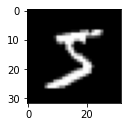

[5 0 4 1 9 2 1 3 1 4 3 5 3 6 1]


In [10]:
import matplotlib.pyplot as plt

plt.figure(figsize = (10, 10))
c = 0
for x in range(5):
    for y in range(3):
        plt.subplot(5, 3, c+1)
        plt.imshow(x_train[c], cmap = 'gray')
        
plt.show()

print(y_train[:15])

In [18]:
model_VGG16 = tf.keras.applications.VGG16(weights = 'imagenet', include_top = False,input_shape = (32,32,3))
for layer in model_VGG16.layers:
  layer.trainable = False
  
x = layers.Flatten()(model_VGG16.output)
x = layers.Dense(4096, activation='relu')(x)
x = layers.Dropout(0.2)(x)
x = layers.Dense(1000, activation='relu')(x)
predictions = layers.Dense(10, activation = 'softmax')(x)

head_model = Model(inputs = model_VGG16.input, outputs = predictions)
head_model.compile(optimizer='adam', loss=losses.sparse_categorical_crossentropy, metrics=['accuracy'])
head_model.summary()

58889256/58889256 [==============================] - 1s 0us/step
Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 32, 32, 3)]       0         
                                                                 
 block1_conv1 (Conv2D)       (None, 32, 32, 64)        1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 32, 32, 64)        36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 16, 16, 64)        0         
                                                                 
 block2_conv1 (Conv2D)       (None, 16, 16, 128)       73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 16, 16, 128)       147584    
                                                              

In [21]:
history = head_model.fit(x_train, y_train, batch_size=64, epochs=10, validation_data = (x_test, y_test))

Epoch 1/10
938/938 [==============================] - 10s 11ms/step - loss: 0.0836 - accuracy: 0.9721 - val_loss: 0.0966 - val_accuracy: 0.9682
Epoch 2/10
938/938 [==============================] - 10s 11ms/step - loss: 0.0820 - accuracy: 0.9726 - val_loss: 0.1208 - val_accuracy: 0.9630
Epoch 3/10
938/938 [==============================] - 10s 11ms/step - loss: 0.0762 - accuracy: 0.9742 - val_loss: 0.0757 - val_accuracy: 0.9757
Epoch 4/10
938/938 [==============================] - 10s 11ms/step - loss: 0.0747 - accuracy: 0.9751 - val_loss: 0.0949 - val_accuracy: 0.9699
Epoch 5/10
938/938 [==============================] - 10s 11ms/step - loss: 0.0737 - accuracy: 0.9758 - val_loss: 0.1001 - val_accuracy: 0.9696
Epoch 6/10
938/938 [==============================] - 10s 11ms/step - loss: 0.0677 - accuracy: 0.9768 - val_loss: 0.1148 - val_accuracy: 0.9665
Epoch 7/10
938/938 [==============================] - 10s 11ms/step - loss: 0.0668 - accuracy: 0.9775 - val_loss: 0.0869 - val_accuracy:

C:\Users\Public\Documents\ESTsoft\CreatorTemp\ipykernel_10136\261039281.py:14: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


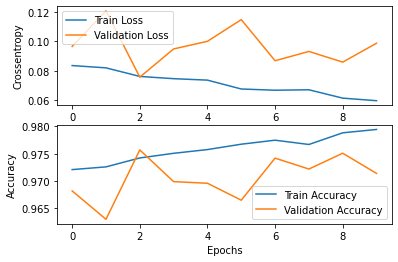

In [22]:
fig, axes = plt.subplots(2, 1)

axes[0].plot(history.history['loss'], label = 'Train Loss')
axes[0].plot(history.history['val_loss'], label = 'Validation Loss')
axes[0].set_ylabel('Crossentropy')
axes[0].legend()

axes[1].plot(history.history['accuracy'], label = 'Train Accuracy')
axes[1].plot(history.history['val_accuracy'], label = 'Validation Accuracy')
axes[1].set_ylabel('Accuracy')
axes[1].legend()
axes[1].set_xlabel('Epochs')

fig.show()